In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

df_train = pd.read_csv('train_final.csv')
df_test = pd.read_csv('test_final.csv')

In [2]:
target = df_train["Y"]
id = df_test["Id"].values

df_train.drop(['Id','Y'],axis=1,inplace=True)
df_test.drop(['Id'],axis=1,inplace=True)

In [3]:
print('Binary features summary statistics')
df_train.describe().T.style.bar(subset = ['mean'], color = 'grey').bar(subset = ['std'],color = 'grey').background_gradient(cmap = 'GnBu')

Binary features summary statistics


,count,mean,std,min,25%,50%,75%,max
2,2603.000000,0.000768,0.027714,0.000000,0.000000,0.000000,0.000000,1.000000
3,2603.000000,0.463312,0.498748,0.000000,0.000000,0.000000,1.000000,1.000000
4,2603.000000,-46.734537,394.284920,-3136.000000,0.000000,0.000000,0.000000,1175.000000
5,2603.000000,0.000768,0.027714,0.000000,0.000000,0.000000,0.000000,1.000000
6,2603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2603.000000,0.275836,0.447020,0.000000,0.000000,0.000000,1.000000,1.000000
8,2603.000000,0.023434,0.151308,0.000000,0.000000,0.000000,0.000000,1.000000
9,2603.000000,0.000384,0.019600,0.000000,0.000000,0.000000,0.000000,1.000000
10,2603.000000,0.955436,0.206384,0.000000,1.000000,1.000000,1.000000,1.000000
11,2603.000000,0.001921,0.043794,0.000000,0.000000,0.000000,0.000000,1.000000


In [4]:
from sklearn import preprocessing

#columns = ['4','63','132', '146', '180','382', '119', '198', '379']
columns = ['4', '119', '180','383', '384', '379']
minmax_scale_train = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit(df_train[columns])
df_train[columns] = minmax_scale_train.transform(df_train[columns])

minmax_scale_test = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit(df_test[columns])
df_test[columns] = minmax_scale_test.transform(df_test[columns])

In [5]:
non_columns = ['63','132','382','146','198']
minmax_scale_train = preprocessing.MinMaxScaler().fit(df_train[non_columns])
df_train[non_columns] = minmax_scale_train.transform(df_train[non_columns])

minmax_scale_test = preprocessing.MinMaxScaler().fit(df_test[non_columns])
df_test[non_columns] = minmax_scale_test.transform(df_test[non_columns])

In [6]:
# drop_extras = [ '146','198']
# drop_extras = [ '198']

# df_train =  df_train.drop(drop_extras,axis=1)        
# df_test = df_test.drop(drop_extras,axis=1)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=380)
pca_values = pca.fit_transform(df_train)
df_train_pca = pd.DataFrame(pca_values)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_train_pca, target, test_size=0.33, random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression().fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


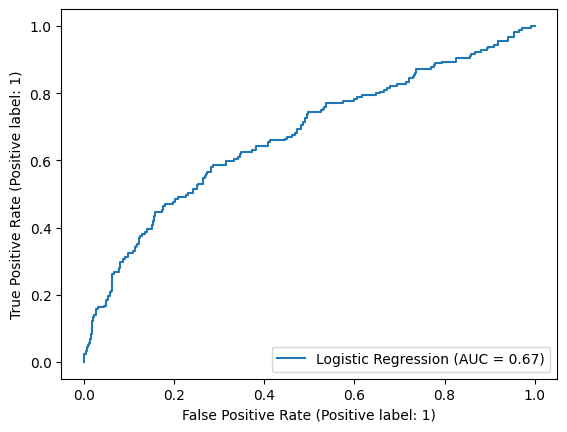

In [10]:
plot_roc_curve(log_reg, x_test, y_test, name = 'Logistic Regression')

In [11]:
y_proba = log_reg.predict_proba(x_test)
roc_auc_score(y_test, y_proba[:,1])

0.6727571475517582

In [12]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(iterations=1000, 
                 learning_rate=0.03, depth=6, verbose=0)

catboost.fit(x_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


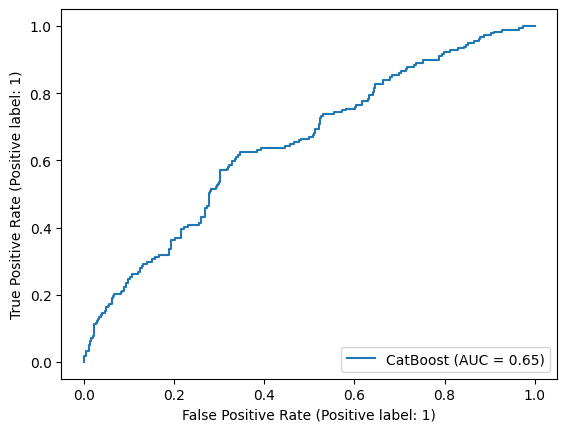

In [13]:
plot_roc_curve(catboost, x_test, y_test, name = 'CatBoost')

In [14]:
y_proba = catboost.predict_proba(x_test)
roc_auc_score(y_test, y_proba[:,1])

0.649728885967795

In [15]:
# sub_proba = catboost.predict_proba(df_test)
# pred_col=np.c_[id,sub_proba[:,1]]

# submission = pd.DataFrame(pred_col, columns = ['Id','Y'])
# submission["Id"] = submission["Id"].astype("Int32")
# submission

In [16]:
# submission.to_csv('4submission.csv', index=False)